# Liner regression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

## EDA

In [2]:
df= pd.read_csv('employee.csv')

In [3]:
df.head(10)

,id,timestamp,country,employment_status,job_title,job_years,is_manager,hours_per_week,telecommute_days_per_week,education,is_education_computer_related,certifications,salary
0,1,12/11/2018 10:52:26,Slovenia,Full time,Developer,4.78393,Yes,40.0,0.0,Bachelors (4 years),Yes,No,7187.743094
1,2,1/5/2017 16:57:50,United States,Full time,DBA,5.00000,No,40.0,5.0,Bachelors (4 years),Yes,No,10000.000000
2,3,12/18/2017 8:13:15,Sweden,Full time,DBA,1.00000,No,40.0,0.0,Masters,Yes,Yes,7000.000000
3,4,12/27/2018 4:56:52,United States,Full time,DBA,1.00000,No,40.0,2.0,Bachelors (4 years),No,No,8333.000000
4,5,12/11/2018 14:07:58,United States,Full time,Developer,3.00000,No,40.0,2.0,Masters,Yes,Yes,7137.000000
5,6,1/8/2017 12:58:49,United Kingdom,Full time,Developer,1.00000,No,38.0,0.0,Bachelors (4 years),No,No,5833.000000
6,7,1/9/2017 11:27:40,Canada,Full time,DBA,5.00000,No,40.0,0.0,Associates (2 years),Yes,Yes,7166.000000
7,8,12/13/2017 7:41:41,United States,Full time,DBA,0.00000,No,45.0,4.0,Bachelors (4 years),No,Yes,8750.000000
8,9,1/9/2017 19:37:30,United States,Full time,Developer,4.78393,Yes,40.0,0.0,Bachelors (4 years),Yes,No,7187.743094
9,10,12/12/2017 11:44:16,New Zealand,Full time,DBA,5.00000,Yes,40.0,0.0,Bachelors (4 years),No,No,7166.000000


In [4]:
#deleting columns in terms of description
data = df.drop(columns=['id', 'timestamp','country'])

In [5]:
#droping null values
data = data.dropna()

In [6]:
data.shape

(4234, 10)

In [7]:
#general information
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4234 entries, 0 to 4276
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   employment_status              4234 non-null   object 
 1   job_title                      4234 non-null   object 
 2   job_years                      4234 non-null   float64
 3   is_manager                     4234 non-null   object 
 4   hours_per_week                 4234 non-null   float64
 5   telecommute_days_per_week      4234 non-null   float64
 6   education                      4234 non-null   object 
 7   is_education_computer_related  4234 non-null   object 
 8   certifications                 4234 non-null   object 
 9   salary                         4234 non-null   float64
dtypes: float64(4), object(6)
memory usage: 363.9+ KB


In [8]:
data['salary'].describe()

count     4234.000000
mean      7058.592809
std       1310.689121
min       3622.000000
25%       6496.788236
50%       7166.000000
75%       7615.707991
max      10625.000000
Name: salary, dtype: float64

## Data visulization

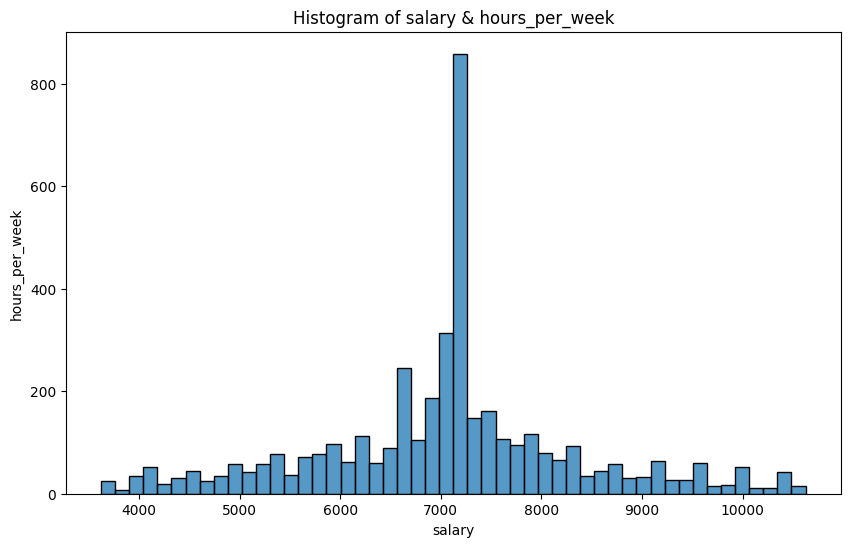

In [9]:
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data['salary'], bins=50, kde=False)
plt.title('Histogram of salary & hours_per_week')
plt.xlabel('salary')
plt.ylabel('hours_per_week')
plt.show()

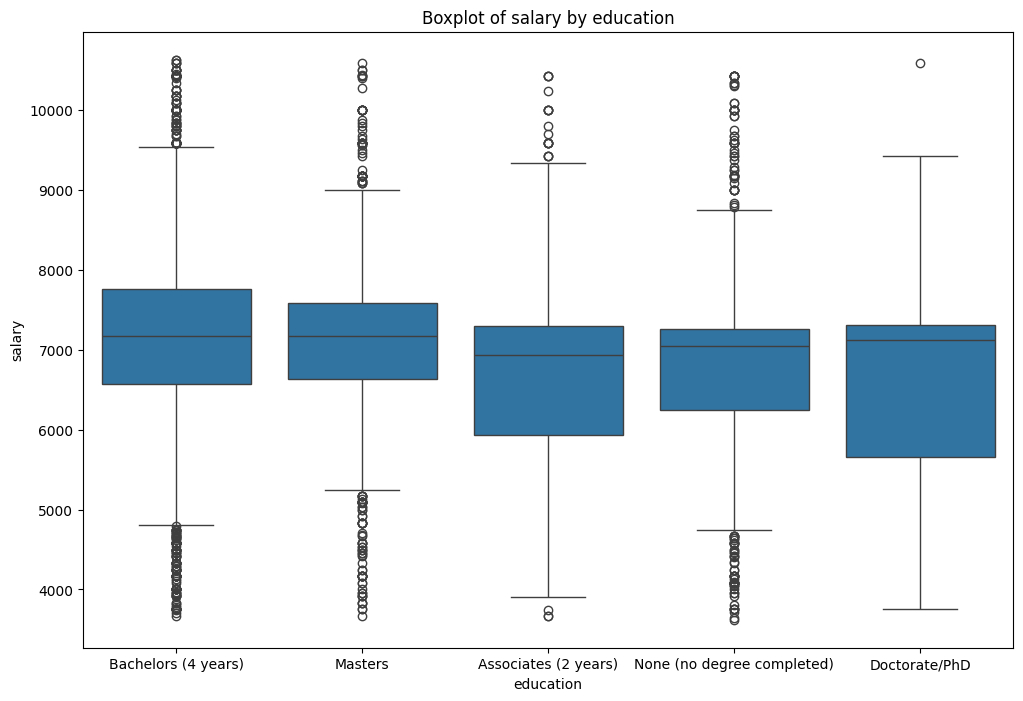

In [10]:
# Boxplot of salary by education
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='education', y='salary')
plt.title('Boxplot of salary by education')
plt.xlabel('education')
plt.ylabel('salary')
plt.show()

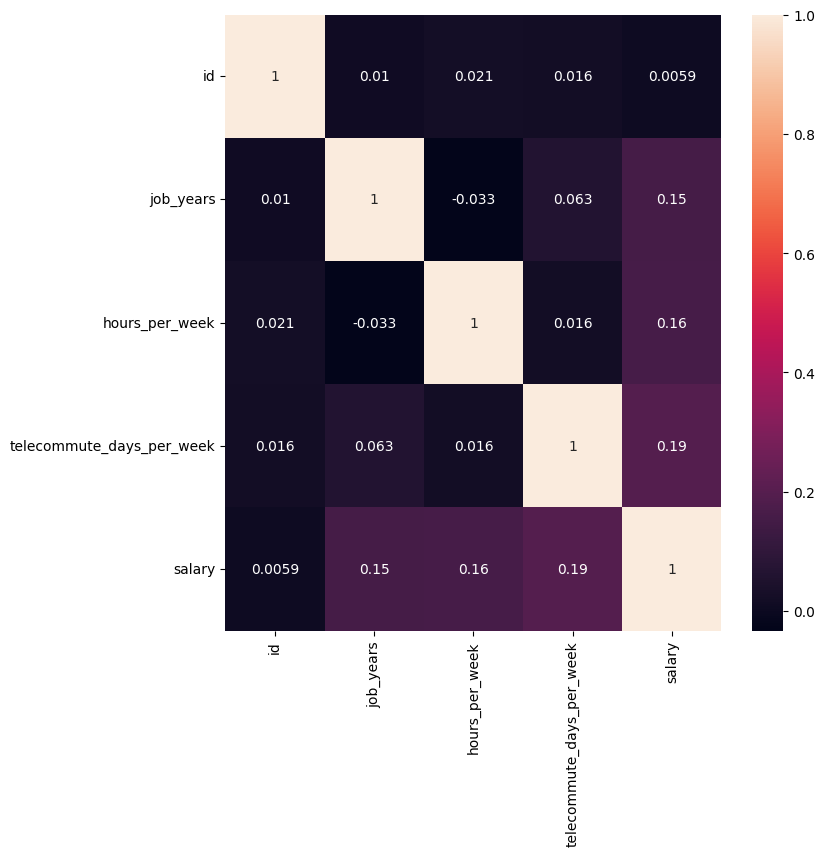

In [11]:
# Showing correlation

data.corr(numeric_only=True)
plt.figure(figsize = (8,8))
sns.heatmap(df.corr(numeric_only=True), annot=True);
plt.show()

## Encoding


In [12]:
# create a copy of dataset and append encoded features to it
data_train = data.copy()
data_train.head()


,employment_status,job_title,job_years,is_manager,hours_per_week,telecommute_days_per_week,education,is_education_computer_related,certifications,salary
0,Full time,Developer,4.78393,Yes,40.0,0.0,Bachelors (4 years),Yes,No,7187.743094
1,Full time,DBA,5.00000,No,40.0,5.0,Bachelors (4 years),Yes,No,10000.000000
2,Full time,DBA,1.00000,No,40.0,0.0,Masters,Yes,Yes,7000.000000
3,Full time,DBA,1.00000,No,40.0,2.0,Bachelors (4 years),No,No,8333.000000
4,Full time,Developer,3.00000,No,40.0,2.0,Masters,Yes,Yes,7137.000000


In [13]:
# select categorical features
cat_cols = [c for c in data_train.columns if data_train[c].dtype == 'object'
            and c not in ['is_manager', 'certifications']]
cat_data = data_train[cat_cols]
cat_cols


['employment_status',
 'job_title',
 'education',
 'is_education_computer_related']

In [14]:
#Encoding binary variables
binary_cols = ['is_manager', 'certifications']
for c in binary_cols:
    data_train[c] = data_train[c].replace(to_replace=['Yes'], value=1)
    data_train[c] = data_train[c].replace(to_replace=['No'], value=0)

In [15]:
#Encoding
train_df = pd.get_dummies(data_train, columns=cat_cols, drop_first= True,dtype=int)
train_df.shape

(4234, 25)

In [16]:
train_df.columns

Index(['job_years', 'is_manager', 'hours_per_week',
       'telecommute_days_per_week', 'certifications', 'salary',
       'employment_status_Independent or freelancer or company owner',
       'employment_status_Part time', 'job_title_Analytics consultant',
       'job_title_Architect', 'job_title_DBA', 'job_title_Data Scientist',
       'job_title_Developer', 'job_title_Engineer', 'job_title_Manager',
       'job_title_Other', 'job_title_Principal database engineer',
       'job_title_Sales', 'job_title_Sr Consultant ',
       'education_Bachelors (4 years)', 'education_Doctorate/PhD',
       'education_Masters', 'education_None (no degree completed)',
       'is_education_computer_related_Unknown',
       'is_education_computer_related_Yes'],
      dtype='object')

In [17]:
train_df

,job_years,is_manager,hours_per_week,telecommute_days_per_week,certifications,salary,employment_status_Independent or freelancer or company owner,employment_status_Part time,job_title_Analytics consultant,job_title_Architect,...,job_title_Other,job_title_Principal database engineer,job_title_Sales,job_title_Sr Consultant,education_Bachelors (4 years),education_Doctorate/PhD,education_Masters,education_None (no degree completed),is_education_computer_related_Unknown,is_education_computer_related_Yes
0,4.783930,1,40.000000,0.0,0,7187.743094,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,5.000000,0,40.000000,5.0,0,10000.000000,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1.000000,0,40.000000,0.0,1,7000.000000,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,1.000000,0,40.000000,2.0,0,8333.000000,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,3.000000,0,40.000000,2.0,1,7137.000000,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4271,4.907064,0,40.727005,0.0,1,6600.640014,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4272,2.000000,1,40.000000,0.0,0,4917.000000,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4274,5.000000,0,40.000000,0.0,0,7166.000000,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4275,4.000000,1,40.000000,2.0,0,9583.000000,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


## Applying Linear Regression

train and test

In [18]:
#split the data sets

y = train_df['salary']
X = train_df.drop(columns=['salary'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("Training Set Dimensions:", X_train.shape)
print("Validation Set Dimensions:", X_test.shape)

Training Set Dimensions: (3387, 24)
Validation Set Dimensions: (847, 24)


In [19]:
# select numerical features
num_cols = ['job_years','hours_per_week','telecommute_days_per_week']
num_cols

['job_years', 'hours_per_week', 'telecommute_days_per_week']

In [20]:
# Apply standard scaling on numeric data
scaler = StandardScaler()
scaler.fit(X_train[num_cols])
X_train[num_cols] = scaler.transform(X_train[num_cols])

In [21]:
X_train

,job_years,is_manager,hours_per_week,telecommute_days_per_week,certifications,employment_status_Independent or freelancer or company owner,employment_status_Part time,job_title_Analytics consultant,job_title_Architect,job_title_DBA,...,job_title_Other,job_title_Principal database engineer,job_title_Sales,job_title_Sr Consultant,education_Bachelors (4 years),education_Doctorate/PhD,education_Masters,education_None (no degree completed),is_education_computer_related_Unknown,is_education_computer_related_Yes
2758,-0.502438,0,-0.134608,2.418482,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
4189,-0.284343,0,0.284157,2.418482,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
2932,0.976357,0,-0.050663,0.595606,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3467,-1.756248,0,2.362030,-0.619645,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2305,0.758482,0,-0.487748,0.595606,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,-1.253302,0,-0.487748,-0.619645,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2260,-0.247410,0,-0.487748,-0.619645,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
598,-1.253302,0,2.362030,-0.619645,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2085,-0.750356,0,-0.487748,-0.619645,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [22]:
#Linear Regression Model
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 salary   R-squared (uncentered):                   0.971
Model:                            OLS   Adj. R-squared (uncentered):              0.971
Method:                 Least Squares   F-statistic:                              5940.
Date:                Mon, 15 Apr 2024   Prob (F-statistic):                        0.00
Time:                        22:21:14   Log-Likelihood:                         -36083.
No. Observations:                4234   AIC:                                  7.221e+04
Df Residuals:                    4210   BIC:                                  7.237e+04
Df Model:                          24                                                  
Covariance Type:            nonrobust                                                  
================================================================================================================================
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
job_years                                                       94.2194      9.444      9.977      0.000      75.705     112.734
is_manager                                                      60.4766     49.717      1.216      0.224     -36.996     157.949
hours_per_week                                                 135.2691      2.573     52.574      0.000     130.225     140.313
telecommute_days_per_week                                      136.0831     11.607     11.724      0.000     113.328     158.839
certifications                                                  69.9024     38.177      1.831      0.067      -4.944     144.749
employment_status_Independent or freelancer or company owner   -10.2719     97.438     -0.105      0.916    -201.302     180.758
employment_status_Part time                                    147.8764    281.978      0.524      0.600    -404.950     700.703
job_title_Analytics consultant                               -2253.0955   1224.219     -1.840      0.066   -4653.210     147.019
job_title_Architect                                           1116.8076    107.675     10.372      0.000     905.707    1327.908
job_title_DBA                                                  881.6931     87.689     10.055      0.000     709.777    1053.609
job_title_Data Scientist                                       723.3213    286.691      2.523      0.012     161.256    1285.387
job_title_Developer                                            578.6833     91.520      6.323      0.000     399.256     758.110
job_title_Engineer                                            1032.1567    125.126      8.249      0.000     786.844    1277.470
job_title_Manager                                              841.4855    122.174      6.888      0.000     601.960    1081.010
job_title_Other                                                 96.3714    168.980      0.570      0.568    -234.919     427.662
job_title_Principal database engineer                         1003.2733   1222.811      0.820      0.412   -1394.081    3400.628
job_title_Sales                                                767.9239   1222.491      0.628      0.530   -1628.803    3164.650
job_title_Sr Consultant                                       3624.7864   1224.159      2.961      0.003    1224.789    6024.784
education_Bachelors (4 years)                                  380.1326     61.417      6.189      0.000     259.724     500.541
education_Doctorate/PhD                                         17.4063    231.538      0.075      0.940    -436.531     471.343
education_Masters

In [23]:
# MAE & MSE for Linear Regression Model

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)


Mean Absolute Error: 861.123960844801
Mean Squared Error: 1497476.9140011105


In [24]:
model.predict(X).head(10)

0    6711.626228
1    7654.932801
2    6509.409681
3    7038.974538
4    6667.004830
5    6193.260363
6    6664.287319
7    7963.169096
8    6711.626228
9    7204.162755
dtype: float64

## Applying Lasso Regression

In [25]:
#Lasso Regression model
model_ridge = sm.regression.linear_model.OLS(y,X).fit_regularized(alpha = 1, L1_wt = 1, refit=True)
model_ridge.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 salary   R-squared (uncentered):                   0.971
Model:                            OLS   Adj. R-squared (uncentered):              0.971
Method:                 Least Squares   F-statistic:                          1.013e+04
Date:                Mon, 15 Apr 2024   Prob (F-statistic):                        0.00
Time:                        22:21:15   Log-Likelihood:                         -36099.
No. Observations:                4234   AIC:                                  7.223e+04
Df Residuals:                    4220   BIC:                                  7.232e+04
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
================================================================================================================================
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
job_years                                                       94.0486      9.453      9.949      0.000      75.515     112.582
is_manager                                                      68.0486     49.732      1.368      0.171     -29.452     165.549
hours_per_week                                                 140.5333      2.260     62.183      0.000     136.103     144.964
telecommute_days_per_week                                      137.9256     11.488     12.006      0.000     115.403     160.448
certifications                                                  76.5988     38.200      2.005      0.045       1.706     151.492
employment_status_Independent or freelancer or company owner          0          0        nan        nan           0           0
employment_status_Part time                                           0          0        nan        nan           0           0
job_title_Analytics consultant                                        0          0        nan        nan           0           0
job_title_Architect                                           1043.5499    104.314     10.004      0.000     839.039    1248.060
job_title_DBA                                                  806.4224     83.974      9.603      0.000     641.789     971.056
job_title_Data Scientist                                              0          0        nan        nan           0           0
job_title_Developer                                            509.0104     87.912      5.790      0.000     336.656     681.365
job_title_Engineer                                             968.3050    122.610      7.897      0.000     727.924    1208.686
job_title_Manager                                              775.9723    119.174      6.511      0.000     542.328    1009.617
job_title_Other                                                  7.8956    167.247      0.047      0.962    -319.997     335.788
job_title_Principal database engineer                                 0          0        nan        nan           0           0
job_title_Sales                                                       0          0        nan        nan           0           0
job_title_Sr Consultant                                               0          0        nan        nan           0           0
education_Bachelors (4 years)                                  229.6488     41.781      5.497      0.000     147.737     311.561
education_Doctorate/PhD                                               0          0        nan        nan           0           0
education_Masters

In [26]:
# MAE & MSE for Ridge regularization model

y_pred = model_ridge.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)

Mean Absolute Error: 865.884163465551
Mean Squared Error: 1509439.7023597658


In [27]:
model_ridge.predict(X).head(10)

0    6708.713690
1    7648.026296
2    6429.153759
3    7027.303410
4    6595.690228
5    6172.973528
6    6805.348174
7    7988.371411
8    6708.713690
9    7195.695161
dtype: float64

## Eveluation

In [30]:
#Comparing two model's mean square error

mse_linear = mean_squared_error(y_test, model.predict(X_test))
mse_ridge = mean_squared_error(y_test, model_ridge.predict(X_test))

print("Mean squared error for linear regression:", mse_linear)
print("Mean squared error for ridge regression:", mse_ridge)

if mse_linear < mse_ridge:
    print("Linear regression model has a lower mean squared error.")
else:
    print("Ridge regression model has a lower mean squared error.")


Mean squared error for linear regression: 1497476.9140011105
Mean squared error for ridge regression: 1509439.7023597658
Linear regression model has a lower mean squared error.
